In [68]:
from __future__ import division
from __future__ import print_function

import numpy as np

## Problem 4. Naive Bayes classifier

b)

In [15]:
_p_char_lang = {
    'a': {
        'E': 0.08167,
        'P': 0.10503,
        'S': 0.11525
    },
    'e': {
        'E': 0.12702,
        'P': 0.07352,
        'S': 0.12181
    },
    'i': {
        'E': 0.06966,
        'P': 0.08328,
        'S': 0.06247
    },
    'o': {
        'E': 0.07507,
        'P': 0.02445,
        'S': 0.08683
    },
    'u': {
        'E': 0.02758,
        'P': 0.02062,
        'S': 0.02927
    },
    'y': {
        'E': 0.01974,
        'P': 0.03206,
        'S': 0.01008
    },
    'other': {
        'E': 0.59926,
        'P': 0.66104,
        'S': 0.57429
    }
}


def is_vovel(char):
    return char in ['a', 'e', 'i', 'o', 'u', 'y']


def p_char_lang(char, lang):
    return _p_char_lang[char][lang] if is_vovel(char) else _p_char_lang['other'][lang]            

In [16]:
p_lang = {
    'E': 1. / 3.,
    'P': 1. / 3.,
    'S': 1. / 3.
}


def classify(phrase):
    languages = ['E', 'P', 'S']
    characters_p_product = {l: 1 for l in languages}
    p_phrase = 0
    
    for l in languages:
        characters_p_product[l] *= p_lang[l]
        for c in phrase:
            if c.isalpha():
                characters_p_product[l] *= p_char_lang(c, l)
        p_phrase += characters_p_product[l]

    for l in languages:
        print("p({}|{}) = {}".format(l, phrase, characters_p_product[l] / p_phrase))

In [28]:
test_phrases = [
    "bull", "borro", "kurczak", "pollo", 
    "litwo, ojczyzno moja, ty jestes jak zdrowie",
    "mama just killed a man put a gun against his head",
    "maradona es mas grande que pele"
]

for phrase in test_phrases:
    classify(phrase)
    print("")

p(E|bull) = 0.340414336935
p(P|bull) = 0.341617091735
p(S|bull) = 0.31796857133

p(E|borro) = 0.431059121511
p(P|borro) = 0.0613760710772
p(S|borro) = 0.507564807412

p(E|kurczak) = 0.264483743406
p(P|kurczak) = 0.415342565495
p(S|kurczak) = 0.3201736911

p(E|pollo) = 0.431059121511
p(P|pollo) = 0.0613760710772
p(S|pollo) = 0.507564807412

p(E|litwo, ojczyzno moja, ty jestes jak zdrowie) = 0.742553556779
p(P|litwo, ojczyzno moja, ty jestes jak zdrowie) = 0.0258285775075
p(S|litwo, ojczyzno moja, ty jestes jak zdrowie) = 0.231617865713

p(E|mama just killed a man put a gun against his head) = 0.043895629255
p(P|mama just killed a man put a gun against his head) = 0.750474292668
p(S|mama just killed a man put a gun against his head) = 0.205630078077

p(E|maradona es mas grande que pele) = 0.233087590452
p(P|maradona es mas grande que pele) = 0.0512296390136
p(S|maradona es mas grande que pele) = 0.715682770534



c)

In [34]:
p_lang = {
    'E': 0.5,
    'P': 0.2,
    'S': 0.3
}

for phrase in test_phrases:
    classify(phrase)
    print("")

p(E|bull) = 0.509722622484
p(P|bull) = 0.204609431497
p(S|bull) = 0.285667946019

p(E|borro) = 0.567072300632
p(P|borro) = 0.0322968874502
p(S|borro) = 0.400630811917

p(E|kurczak) = 0.424719980873
p(P|kurczak) = 0.266790365565
p(S|kurczak) = 0.308489653562

p(E|pollo) = 0.567072300632
p(P|pollo) = 0.0322968874502
p(S|pollo) = 0.400630811917

p(E|litwo, ojczyzno moja, ty jestes jak zdrowie) = 0.832593827428
p(P|litwo, ojczyzno moja, ty jestes jak zdrowie) = 0.011584195649
p(S|litwo, ojczyzno moja, ty jestes jak zdrowie) = 0.155821976924

p(E|mama just killed a man put a gun against his head) = 0.0939017469528
p(P|mama just killed a man put a gun against his head) = 0.642167325729
p(S|mama just killed a man put a gun against his head) = 0.263930927318

p(E|maradona es mas grande que pele) = 0.34127570644
p(P|maradona es mas grande que pele) = 0.0300031952985
p(S|maradona es mas grande que pele) = 0.628721098262



d)

In [36]:
phrase = "postman pat, postman pat, postman pat and his black and white cat"
classify(phrase)

p(E|postman pat, postman pat, postman pat and his black and white cat) = 0.0936019124949
p(P|postman pat, postman pat, postman pat and his black and white cat) = 0.452883221469
p(S|postman pat, postman pat, postman pat and his black and white cat) = 0.453514866036


## Problem 7.
a)

In [88]:
sequence = "PPRSSRSPPRSPRRSPPPSSPRSPSPSRSP"
symbols = ['R', 'P', 'S']
p_first_symbol = 1. / 3.

# [X][Y] counts choices of Y if the most recent symbol was X
counter = {s: {s: 0 for s in symbols} for s in symbols}

for i in range(len(sequence) - 1):
    counter[sequence[i]][sequence[i+1]] += 1

for s in symbols:
    print(s, ": ", counter[s])

R :  {'P': 0, 'S': 6, 'R': 1}
P :  {'P': 4, 'S': 3, 'R': 4}
S :  {'P': 7, 'S': 2, 'R': 2}


In [95]:
print("CONFIGURATION:")

for s in symbols:
    print("p({}|first) = {}".format(s, 1 / 3))
print()

# [X][Y] is probability of choosing Y if the most recent symbol was X
klapaucius_config = {
    prev: {
        curr: counts[curr] / sum(counts.values())
        for curr in counts
    }
    for prev, counts in counter.iteritems()
}

for prev, conf in klapaucius_config.iteritems():
    for curr, p_curr_prev in conf.iteritems():
        print("p({}|{}) = {}".format(curr, prev, p_curr_prev))
    print()

CONFIGURATION:
p(R|first) = 0.333333333333
p(P|first) = 0.333333333333
p(S|first) = 0.333333333333

p(P|P) = 0.363636363636
p(S|P) = 0.272727272727
p(R|P) = 0.363636363636

p(P|S) = 0.636363636364
p(S|S) = 0.181818181818
p(R|S) = 0.181818181818

p(P|R) = 0.0
p(S|R) = 0.857142857143
p(R|R) = 0.142857142857



b)

In [108]:
sequence = "PPRSSRSPPRSPRRSPPPSSPRSPSPSRSP"
sequence_len = len(sequence)
trurl_config = {
    'R': sequence.count('R') / sequence_len,
    'P': sequence.count('P') / sequence_len,
    'S': sequence.count('S') / sequence_len
}

In [107]:
print("CONFIGURATION:")
for s, p_s in trurl_config.iteritems():
    print("p({}) = {}".format(s, p_s))

CONFIGURATION:
p(P) = 0.4
p(S) = 0.366666666667
p(R) = 0.233333333333


Game:

In [146]:
def get_trurl_move():
    pbb = trurl_config
    return np.random.choice(['R', 'P', 'S'], p=[pbb['R'], pbb['P'], pbb['S']])

In [145]:
def get_klapaucius_move(last_move):
    if last_move is None:
        return np.random.choice(['R', 'P', 'S'])
    
    pbb = klapaucius_config[last_move]
    return np.random.choice(['R', 'P', 'S'], p=[pbb['R'], pbb['P'], pbb['S']])

In [152]:
winning_pairs = [('R', 'S'), ('S', 'P'), ('P', 'R')]

def check_victory(move1, move2):
    if move1 == move2:
        return 0
    if (move1, move2) in winning_pairs:
        return 1
    return -1

In [153]:
rounds = 1000000
klapaucius_wins_count = 0
trurl_wins_count = 0

for _ in range(rounds):
    klapaucius_last_move = None
    state = 0
    while state == 0:
        klapaucius_last_move = get_klapaucius_move(klapaucius_last_move)
        trurl_last_move = get_trurl_move()
        state = check_victory(klapaucius_last_move, trurl_last_move)
    
    klapaucius_wins_count += (state == 1)
    trurl_wins_count += (state == -1)

print("Klapaucius wins:", klapaucius_wins_count)
print("Trurl wins:", trurl_wins_count)

Klapaucius wins: 500201
Trurl wins: 499799


## Problem 6.

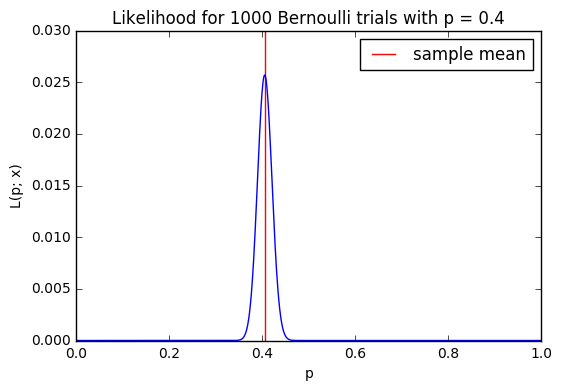

In [42]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import binom


def L(p, k, n):
    return binom(n, k) * (p ** k) * (1 - p) ** (n - k)


def solve(n, p):
    successes = np.random.binomial(n, p)
    plt.axvline(successes / n, color='r', label='sample mean')
    xline = np.linspace(0.0, 1.0, 1000)
    yline = L(xline, successes, n)
    plt.plot(xline, yline)
    plt.xlabel('p')
    plt.ylabel('L(p; x)')
    plt.legend(loc='upper right')
    plt.title('Likelihood for {} Bernoulli trials with p = {}'.format(n, p))
    plt.show()

    
solve(1000, 0.4)